### 데이터 EDA

In [3]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import pandas
data = joblib.load('data.pkl')
data.head(2)

,Date,taxi_num,call_num,success,mean_time,mean_fee,mean_dit,weekday,month,year,...,board_rate,taxi_rate,quarter,mean_temp,mean_humidity,diff_mean_temp,diff_mean_humidity,diff_sunshine(MJ/m2),diff_mean_time,next_mean_time
1,2015-01-02,420,3158,2839,17.2,2216,8611,Saturday,1.0,2015.0,...,0.898987,0.132996,1,-5.45,45.5,-2.05,-9.5,0.41,-6.0,26.2
2,2015-01-03,209,1648,1514,26.2,2377,10198,Sunday,1.0,2015.0,...,0.918689,0.126820,1,-3.40,55.0,-7.60,-18.5,3.34,9.0,24.5


In [10]:
years = list(data['year'].unique())

In [38]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add an Axes to the current figure or retrieve an existing Axes.
    
    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplo

In [48]:
# 단일 변수 분포 확인 함수
def eda_1_n(data, var_list,hue=None) :
    length = len(var_list)
    width = 15
    height = 5*int(length/3 +1)
    plt.figure(figsize=(15,height))
    for i in range(length):
        plt.subplot(int(length/3 +1), 3,i+1)
        sns.histplot(x=var_list[i], data=data, bins=50, hue=hue)
    plt.show()
    
def eda_1_c(data, var_list) :
    length = len(var_list)
    width = 15
    height = 5*int(length/3 +1)
    plt.figure(figsize=(15,height))
    for i in range(length):
        plt.subplot(int(length/3 +1), 3,i+1)
        sns.countplot(x=var_list[i], data=data, bins=50, hue=hue)
    plt.show()

In [20]:
data.columns

Index(['Date', 'taxi_num', 'call_num', 'success', 'mean_time', 'mean_fee',
       'mean_dit', 'weekday', 'month', 'year', 'day', 'temp_max', 'temp_min',
       'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
       'season', 'holiday', 'mean_time_7days', 'board_rate', 'taxi_rate',
       'quarter', 'mean_temp', 'mean_humidity', 'diff_mean_temp',
       'diff_mean_humidity', 'diff_sunshine(MJ/m2)', 'diff_mean_time',
       'next_mean_time'],
      dtype='object')

In [37]:
length = len(eda_cols)
height = int(length/3 +1)
height

11

In [50]:
# weekday 돌려놓기
data['weekday'] = data['Date'].dt.weekday

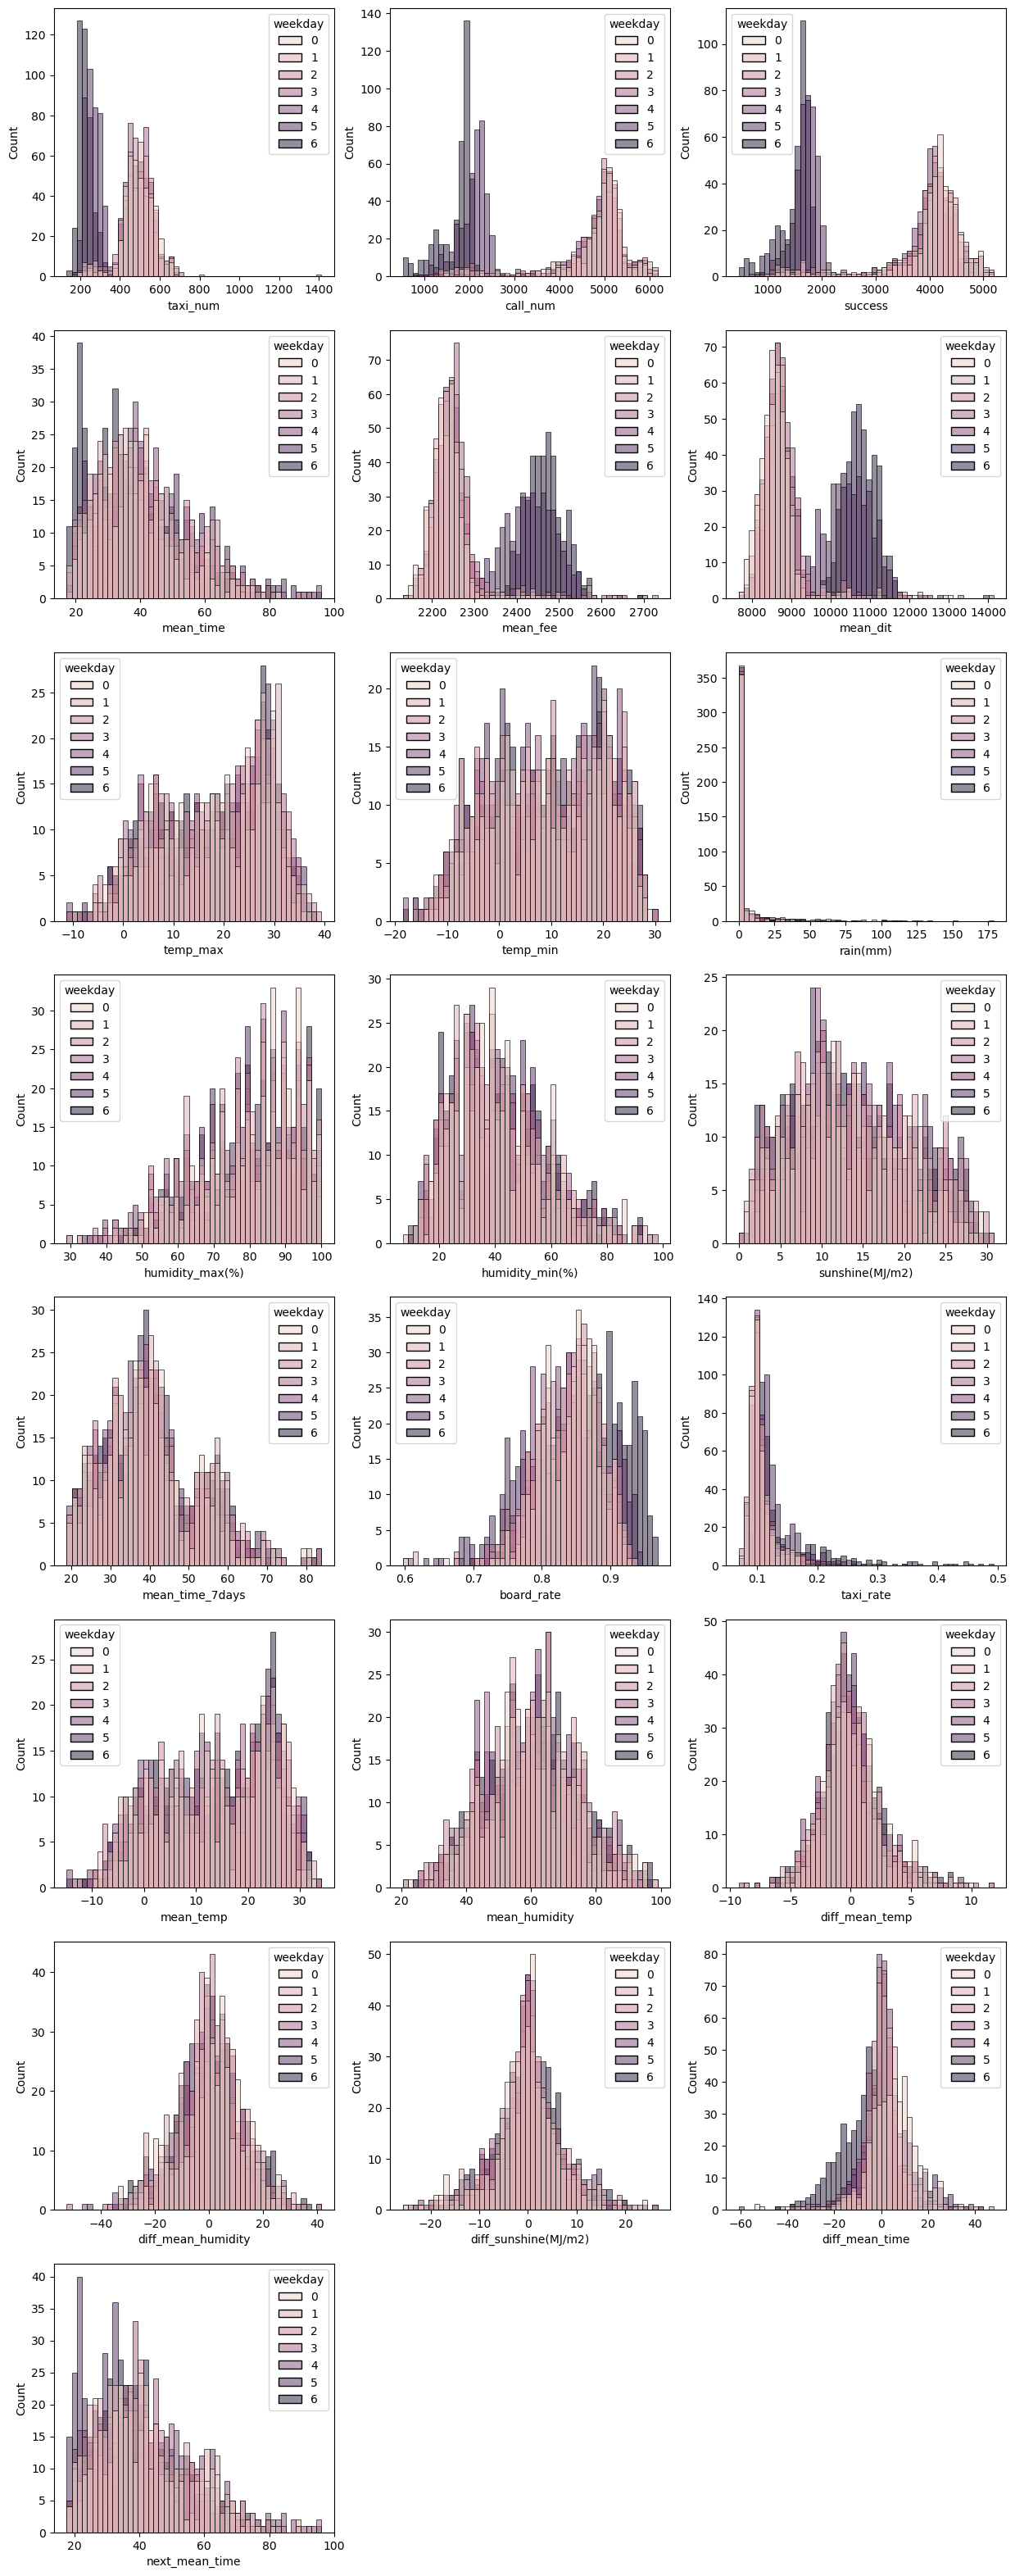

In [51]:
# 단일 변수 분포

eda_n_cols = [ 'taxi_num', 'call_num', 'success', 'mean_time', 'mean_fee',
       'mean_dit', 'temp_max', 'temp_min',
       'rain(mm)', 'humidity_max(%)', 'humidity_min(%)', 'sunshine(MJ/m2)',
        'mean_time_7days', 'board_rate', 'taxi_rate',
      'mean_temp', 'mean_humidity', 'diff_mean_temp',
       'diff_mean_humidity', 'diff_sunshine(MJ/m2)', 'diff_mean_time',
       'next_mean_time']
eda_1_n(data, eda_n_cols, 'weekday')